
*   Need 1200 samples for each genre
*   Need 5 different genres??

In [2]:
import nltk
import re
import random
import pandas as pd
import urllib.request
import itertools
import requests
import string
nltk.download('punkt')
from nltk.corpus import gutenberg
from string import ascii_lowercase
from nltk import FreqDist
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Download Books

In [3]:
class record:
    def __init__(self,author_input,title_input):
        self.author = author_input
        self.title = title_input
        self.chunks = [] # the list that will hold our 200 records of 100 words each.
    def add(self,series):
        self.chunks.append(series) # append to the list
    
class online_book:
    def __init__(self, name, url):
        self.url = url
        self.name = name
    def download(self):
        urllib.request.urlretrieve(self.url, self.name)

book_record_collection = [] #the dict that will hold all of our records.
books_all=[] # Just to test

horrors = [ online_book("the_raven-edgar_allen_poe.txt", "https://www.gutenberg.org/ebooks/1065.txt.utf-8"),
            online_book("dracula-bram_stoker.txt", "https://www.gutenberg.org/ebooks/345.txt.utf-8"), 
            online_book("the_strange_case_of_dr_jekyll_and_mr_hyde-robert_louis_stevenson.txt", "https://www.gutenberg.org/ebooks/42.txt.utf-8"), 
            online_book("the_turn_of_the_screw-henry_james.txt","https://www.gutenberg.org/ebooks/209.txt.utf-8"), 
            online_book("the_wendigo-algernon_blackwood.txt","https://www.gutenberg.org/ebooks/10897.txt.utf-8"),
            online_book("the_shunned_house-hplovecraft.txt","https://www.gutenberg.org/ebooks/31469.txt.utf-8")
        ]

adventures = [ online_book("the_call_of_the_wild-jack_london.txt","https://www.gutenberg.org/ebooks/215.txt.utf-8"),
            online_book("around_the_world_in_eighty_days-jules_verne.txt", "https://www.gutenberg.org/files/103/103-0.txt"), 
            online_book("tarzan_of_the_apes-edgar_rice_burroughs.txt","https://www.gutenberg.org/files/78/78-0.txt"), 
            online_book("the_three_musketeers-alexandre_dumas.txt","https://www.gutenberg.org/ebooks/1257.txt.utf-8"), 
            online_book("the_prisoner_of_zenda-anthony_hope.txt", "https://www.gutenberg.org/ebooks/95.txt.utf-8"),
            online_book("kidnapped-robert_louis_stevenson.txt", "https://www.gutenberg.org/files/421/421-0.txt"),
        ]

sciencefictions = [ online_book("the_war_of_the_worlds-hgwells.txt","https://www.gutenberg.org/ebooks/36.txt.utf-8"),
            online_book("the_lost_world-arthur_conan_doyle.txt","https://www.gutenberg.org/ebooks/139.txt.utf-8"), 
            online_book("twenty_thousand_leagues_under_the_sea-jules_verne.txt", "https://www.gutenberg.org/ebooks/164.txt.utf-8"), 
            online_book("youth-isaac_asimov.txt", "https://www.gutenberg.org/ebooks/31547.txt.utf-8"), 
            online_book("the_gun-philip_k_dick.txt", "https://www.gutenberg.org/ebooks/29132.txt.utf-8"), 
            online_book("the_god_of_mars-edgar_rice_burroughs.txt", "https://www.gutenberg.org/ebooks/64.txt.utf-8"),
        ]

mythologies = [ online_book("myths_and_legends_of_ancient_greece_and_rome-e_m_berens.txt", "https://www.gutenberg.org/ebooks/22381.txt.utf-8"),
            online_book("myths_and_legends_of_china-e_t_c_werner.txt", "https://www.gutenberg.org/ebooks/15250.txt.utf-8"), 
            online_book("the_golden_bough_a_study_of_magic_and_religion-james_george_frazer.txt", "https://www.gutenberg.org/ebooks/3623.txt.utf-8"), 
            online_book("myths_of_babylonia_and_assyria-donald_a_mackenzie.txt", "https://www.gutenberg.org/files/16653/16653-0.txt"), 
            online_book("legends_of_the_gods-sir_e_a_wallis_budge.txt","https://www.gutenberg.org/ebooks/9411.txt.utf-8"), 
            online_book("custom_and_myth-andrew_lang.txt","https://www.gutenberg.org/ebooks/14080.txt.utf-8") 
        ]

politics = [ online_book("the_prince-niccolo_machiavelli.txt","https://www.gutenberg.org/ebooks/1232.txt.utf-8"),
            online_book("leviathan-thomas_hobbes.txt","https://www.gutenberg.org/files/3207/3207-0.txt"), 
            online_book("second_treatise_of_government-john_locke.txt", "https://www.gutenberg.org/ebooks/7370.txt.utf-8"), 
            online_book("the_communist_manifesto-friedrich_engels_and_karl_marx.txt","https://www.gutenberg.org/ebooks/61.txt.utf-8"), 
            online_book("utopia-saint_thomas_more.txt","https://www.gutenberg.org/files/2130/2130-0.txt"), 
            online_book("the_declaration_of_independence_of_the_united_states_of_america-thomas_jefferson.txt", "https://www.gutenberg.org/ebooks/1.txt.utf-8") 
        ]

genres = [horrors, adventures, sciencefictions, mythologies, politics] # pick 5 genres:
authors=[]
if __name__ == "__main__":
  # get 1200 records for each genres:
  for genre in genres:
    # get 1200 records:
        for book in genre:
            book.download()
            # regex to extract <author>-<title>.txt - which is the format of all the books retrieved by fileids()
            author_title_search = re.search(r"(^[a-z_]*)-([a-z_]*)\.txt", book.name)
            
            author = author_title_search.group(2)
            authors.append(author)
            #title = author_title_search.group(2)
            
            #create a new record for this new book:
            #book_record = record(author,title)

            #start extracting:
            # step 1: tokenize
            raw_string = open(book.name).read()
            books_all.append(raw_string)
            tokenized_data = nltk.tokenize.word_tokenize(raw_string)
            # step 2: create 200 records:
            for iteration in range(200):
                # step 2a: which is randomly chosen. 
                start_pos = (random.randint(300,len(tokenized_data)-100))# the first part of the books are usually just the name. Also must have 100 words so can't be at the end of the book.
                extracted_text = []
                # step 2b: and add them to the dict collection upstairs
                for word_to_add in range(start_pos, start_pos+100):
                    extracted_text.append(tokenized_data[word_to_add])
                #book_record.add(pd.Series(extracted_text))
            #book_record_collection.append(book_record)

    # Let's have a 2nd loop here to seperate the steps:
    #for genre in genres:
    #  #training:


## Create Freq distribution for Filtered words

In [4]:
nltk.download('stopwords')
book_diction=[]
book_texts=[]
stop_words=set(stopwords.words('english'))
stop_words.add('mr')
stop_words.add('said')
stop_words.add('“')
stop_words.add('”')
stop_words.add('’')
stop_words.add('‘')


for i,book in enumerate(books_all):
    text = (book)
    ## Remove punctuation
    text=text.translate(str.maketrans('','',string.punctuation))
    ## Lower case
    text=text.lower()
    ## Remove stop words
    tokens=nltk.word_tokenize(text)
    tokens= [t for t in tokens if not t in stop_words]
    book_texts.append(tokens)
    ## Create dic for each label and the related tokens
    
    book_dict= {chr(ord('a') + i): tokens}
    book_diction.append(book_dict)

    for cat_labels, cat_tokens in book_dict.items():
        print(cat_labels)
        fd=FreqDist(cat_tokens)
        print(fd.most_common(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


a
[('project', 88), ('gutenbergtm', 56), ('work', 45), ('works', 32), ('gutenberg', 31), ('electronic', 27), ('terms', 22), ('foundation', 22), ('states', 20), ('copyright', 19), ('agreement', 18), ('license', 17), ('raven', 15), ('united', 15), ('may', 15), ('donations', 15), ('ebook', 13), ('trademark', 13), ('full', 13), ('literary', 13)]
b
[('could', 493), ('one', 491), ('us', 463), ('must', 451), ('would', 428), ('shall', 427), ('may', 418), ('see', 394), ('know', 390), ('time', 369), ('come', 338), ('van', 322), ('came', 307), ('helsing', 300), ('went', 298), ('go', 284), ('like', 275), ('back', 259), ('seemed', 243), ('well', 236)]
c
[('utterson', 130), ('jekyll', 104), ('hyde', 104), ('project', 88), ('man', 85), ('one', 81), ('lawyer', 72), ('upon', 62), ('poole', 61), ('like', 56), ('would', 56), ('sir', 56), ('gutenbergtm', 56), ('door', 52), ('must', 51), ('could', 50), ('see', 50), ('life', 49), ('work', 49), ('dr', 48)]
d
[('little', 184), ('could', 139), ('mrs', 108), ('

## Create 200 partitions of each book of 100 Filtered words 

In [5]:
partitions = []
text_partitions=[]
docs=[]
alp = []

def iter_all_strings():
  for size in itertools.count(1):
    for s in itertools.product(ascii_lowercase, repeat=size):
      yield "".join(s)

# Calls function to create the list of a,b,c, etc... 
for s in itertools.islice(iter_all_strings(), 200):
  alp.append(s)

for i, text in enumerate(book_texts):
    for j in range(200):
        if j==0:
            x=random.randint(0,100)
        start = x 
        end = (x + 100)
        partition = (alp[j], text[start:end])
        #partition = ( chr(ord('a') + i),  text[start:end])
        docdict=book_diction[i]
        text1 = docdict[chr(ord('a') + i)]

        doc = (alp[j], text1[start:end])
        #doc = ( chr(ord('a') + i), text1[start:end])
        docs.append(doc)
        text_partitions.append(text[start:end])
        partitions.append(partition)
        x=end+1


('a', ['rapping', 'rapping', 'chamber', 'door', 'tis', 'visiter', 'muttered', 'tapping', 'chamber', 'door—', 'nothing', 'ah', 'distinctly', 'remember', 'bleak', 'december', 'separate', 'dying', 'ember', 'wrought', 'ghost', 'upon', 'floor', 'eagerly', 'wished', 'morrow—vainly', 'sought', 'borrow', 'books', 'surcease', 'sorrow—sorrow', 'lost', 'lenore—', 'rare', 'radiant', 'maiden', 'angels', 'name', 'lenore—', 'nameless', 'evermore', 'silken', 'sad', 'uncertain', 'rustling', 'purple', 'curtain', 'thrilled', 'me—filled', 'fantastic', 'terrors', 'never', 'felt', 'still', 'beating', 'heart', 'stood', 'repeating', 'tis', 'visiter', 'entreating', 'entrance', 'chamber', 'door—', 'late', 'visiter', 'entreating', 'entrance', 'chamber', 'door', 'nothing', 'presently', 'soul', 'grew', 'stronger', 'hesitating', 'longer', 'sir', 'madam', 'truly', 'forgiveness', 'implore', 'fact', 'napping', 'gently', 'came', 'rapping', 'faintly', 'came', 'tapping', 'tapping', 'chamber', 'door', 'scarce', 'sure', 'h

## Create Training dataset

In [6]:
X_train=[]
Y_train1=[]
Y_train2=[]
#genres = ['Adventure','Mystery','Science Fiction','Romance','Fantasy']
genres = ['horrors', 'adventures', 'sciencefictions', 'mythologies', 'politics']
for i,doc in enumerate(docs):
    X_train.append(docs[i][1])
    gen=i//1200
    name=i//200
    Y_train1.append(genres[gen])
    Y_train2.append(authors[name])
print(X_train[0])
print(len(Y_train2))
#Y_train >> Genre
#Y_train1 >> Genre + Author name
#Y_train2 >> Author name
input_list = X_train
input1_list=Y_train1
input2_list=Y_train2
X_train = []
Y_train1 = []
Y_train2=[]
Y_train=[]
for ele,ele1,ele2 in zip(input_list,input1_list,input2_list):
    if ele!=[]:
        X_train.append(ele)
        Y_train.append(ele1)
        Y_train2.append(ele2)
        j=ele1 + ' '+ele2
        Y_train1.append(j)

df=pd.DataFrame([
     Y_train, X_train
])

df.to_csv('book_stuff_test.csv', index=False)

['rapping', 'rapping', 'chamber', 'door', 'tis', 'visiter', 'muttered', 'tapping', 'chamber', 'door—', 'nothing', 'ah', 'distinctly', 'remember', 'bleak', 'december', 'separate', 'dying', 'ember', 'wrought', 'ghost', 'upon', 'floor', 'eagerly', 'wished', 'morrow—vainly', 'sought', 'borrow', 'books', 'surcease', 'sorrow—sorrow', 'lost', 'lenore—', 'rare', 'radiant', 'maiden', 'angels', 'name', 'lenore—', 'nameless', 'evermore', 'silken', 'sad', 'uncertain', 'rustling', 'purple', 'curtain', 'thrilled', 'me—filled', 'fantastic', 'terrors', 'never', 'felt', 'still', 'beating', 'heart', 'stood', 'repeating', 'tis', 'visiter', 'entreating', 'entrance', 'chamber', 'door—', 'late', 'visiter', 'entreating', 'entrance', 'chamber', 'door', 'nothing', 'presently', 'soul', 'grew', 'stronger', 'hesitating', 'longer', 'sir', 'madam', 'truly', 'forgiveness', 'implore', 'fact', 'napping', 'gently', 'came', 'rapping', 'faintly', 'came', 'tapping', 'tapping', 'chamber', 'door', 'scarce', 'sure', 'heard',

**Vectorization of the Partitions and Test Sets discussed in Presentation** 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
dat=([[' '.join(i)] for i in X_train])
flat_list = [item for sublist in dat for item in sublist]


#vectorizer= TfidfVectorizer(ngram_range=(3,3))
vectorizer=CountVectorizer(stop_words='english',ngram_range=(1,3),min_df=3,analyzer='word')
alpha=vectorizer.fit_transform(flat_list)
Test_Set1='He set to work to carry out a new idea that had come to him. He extended the fire into a large circle. Inside this circle he crouched, his sleeping outfit under him as a protection against the melting snow. When he had thus disappeared within his shelter of flame, the whole pack came curiously to the rim of the fire to see what had become of him. Hitherto they had been denied access to the fire, and they now settled down in a close-drawn circle, like so many dogs, blinking and yawning and stretching their lean bodies in the unaccustomed warmth. Then the she-wolf sat down, pointed her nose at a star, and began to howl. One by one the wolves joined her, till the whole pack, on haunches, with noses pointed skyward, was howling its hunger cry. Dawn came, and daylight. The fire was burning low. The fuel had run out, and there was need to get more. The man attempted to step out of his circle of flame, but the wolves surged to meet him. Burning brands made them spring aside, but they no longer sprang back. In vain he strove to drive them back. As he gave up and stumbled inside his circle, a wolf leaped for him, missed, and landed with all four feet in the coals. It cried out with terror, at the same time snarling, and scrambled back to cool its paws in the snow. The man sat down on his blankets in a crouching position. His body leaned forward from the hips. His shoulders, relaxed and drooping, and his head on his knees advertised that he had given up the struggle. Now and again he raised his head to note the dying down of the fire. The circle of flame and coals was breaking into segments with openings in between. These openings grew in size, the segments diminished. “I guess you can come an’ get me any time,” he mumbled. “Anyway, I’m goin’ to sleep.” Once he awakened, and in an opening in the circle, directly in front of him, he saw the she-wolf gazing at him.'
Test_Set2= 'Again the Elsinore rolled to starboard and to port, while the spume spouted to our lower-yards and a thousand tons of South Atlantic surged across from rail to rail. And again all were down and under, with jagged plank and twisted steel overriding them. And again that amazing blond-skinned giant emerged, on his two legs upstanding, a broken waif like a rat in either hand. He forced his way through rushing, waist-high water, deposited his burdens with the carpenter on the fife-rail, and returned to drag Larry reeling to his feet and help him to the fife-rail. Out of the wash, Tony, the Greek, crawled on hands and knees and sank down helplessly at the fife-rail. There was nothing suicidal now in his mood. Struggle as he would, he could not lift himself until the mate, gripping his oilskin at the collar, with one hand flung him through the air into the carpenter’s arms. Next came Shorty, his face streaming blood, one arm hanging useless, his sea-boots stripped from him. Mr. Pike pitched him into the fife-rail, and returned for the last man. It was Henry, the training-ship boy. Him I had seen, unstruggling, motionless, show at the surface like a drowned man and sink again as the flood surged aft and smashed him against the cabin. Mr. Pike, shoulder-deep, twice beaten to his knees and under by bursting seas, caught the lad, shouldered him, and carried him away for’ard. An hour later, in the cabin, I encountered Mr. Pike going into breakfast. He had changed his clothes, and he had shaved! Now how could one treat a hero such as he save as I treated him when I remarked off-handedly that he must have had a lively watch? “My,” he answered, equally off-handedly, “I did get a prime soaking.” That was all. He had had no time to see me at the poop-rail. It was merely the day’s work, the ship’s work, the MAN’S work—all capitals, if you please, in MAN. I was the only one aft who knew, and I knew because I had chanced to see. Had I not been on the poop at that early hour no one aft ever would have known those gray, storm-morning deeds of his. “Anybody hurt?” I asked. “Oh, some of the men got wet. But no bones broke. Henry’ll be laid off for a day. He got turned over in a sea and bashed his head. And Shorty’s got a wrenched shoulder, I think.—But, say, we got Davis into the top bunk! The seas filled him full and he had to climb for it. He’s all awash and wet now, and you oughta seen me praying for more.” He paused and sighed. “I’m getting old, I guess. I oughta wring his neck, but somehow I ain’t got the gumption. Just the same, he’ll be overside before we get in.” “A month’s wages against a pound of tobacco he won’t,” I challenged. “No,” said Mr. Pike slowly. “But I’ll tell you what I will do. I’ll bet you a pound of tobacco even, or a month’s wages even, that I’ll have the pleasure of putting a sack of coal to his feet that never will come off.”'
Test_Set3= "he first enterprise of real importance performed by the band was an attack by Wallace and fifty of his associates on a party of soldiers, 200 strong, conveying provisions from Carlisle to the garrison of Ayr.  They were under the command of John Fenwick, the same officer who had been at the head of the troop by which Wallace's father had been killed.  Fenwick left twenty of his men to defend the wagons, and with the rest rode forward against the Scots. A stone wall checked their progress, and the Scotch, taking advantage of the momentary confusion, made a furious charge upon them with their spears, cutting their way into the midst of them and making a great slaughter of men and horses. The English rode round and round them, but the Scots, defending themselves with spear and sword, stood so staunchly together that the English could not break through. The battle was long and desperate, but Wallace killed Fenwick with his own hand, and after losing nigh a hundred of their number the English fled in confusion. The whole convoy fell into the hands of the victors, who became possessed of several wagons, 200 carriage horses, flour, wine, and other stores in great abundance; with these they retired into the forest of Clydesdale. The fame of this exploit greatly increased the number of Wallace's followers. So formidable did the gathering become that convoys by land to Ayr were entirely interrupted, and Earl Percy held a council of the nobility at Glasgow, and consulted them as to what had best be done. Finally, Sir Ronald Crawford was summoned and told that unless he induced his nephew to desist from hostilities they should hold him responsible and waste his lands. Sir Ronald visited the band in Clydesdale forest, and rather than harm should come upon him, Wallace and his friends agreed to a truce for two months. Their plunder was stowed away in places of safety, and a portion of the band being left to guard it the rest dispersed to their homes."

test = [Test_Set3]
#vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 3), min_df=1, analyzer='word')

alpha_test = vectorizer.transform(test)

## Creating 10 Folds of dataset for Testing and Training
## FORM ROC and Confusion Matrix

average for confusion matrix results: 
rf: 
[[ 96.7   6.4   3.5   4.2   6.5]
 [ 20.1  36.9   4.7   5.4   6.4]
 [  2.3   1.  108.6   6.8   1.3]
 [  3.2   2.4   7.8  83.2   0.8]
 [ 17.1   6.5   4.3   5.7  57.1]]
sgd: 
[[ 94.2  11.7   1.3   4.6   5.5]
 [  4.8  54.7   2.2   4.6   7.2]
 [  1.3   2.8 109.    5.1   1.8]
 [  2.3   7.2   6.5  79.3   2.1]
 [  4.1  12.4   1.4   2.2  70.6]]
svc: 
[[ 99.9   8.9   1.8   1.5   5.2]
 [  7.2  52.9   3.5   4.3   5.6]
 [  1.4   0.9 113.8   2.9   1. ]
 [  0.8   5.2  10.8  79.8   0.8]
 [  6.5   8.4   1.5   1.2  73.1]]
kn: 
[[24.8 49.3  0.1 40.7  2.4]
 [ 0.3 53.6  0.  18.3  1.3]
 [ 0.6 52.3 14.4 51.8  0.9]
 [ 0.3 23.5  2.  71.4  0.2]
 [ 0.6 43.3  0.  37.6  9.2]]
nb: 
[[ 96.7   6.4   3.5   4.2   6.5]
 [ 20.1  36.9   4.7   5.4   6.4]
 [  2.3   1.  108.6   6.8   1.3]
 [  3.2   2.4   7.8  83.2   0.8]
 [ 17.1   6.5   4.3   5.7  57.1]]


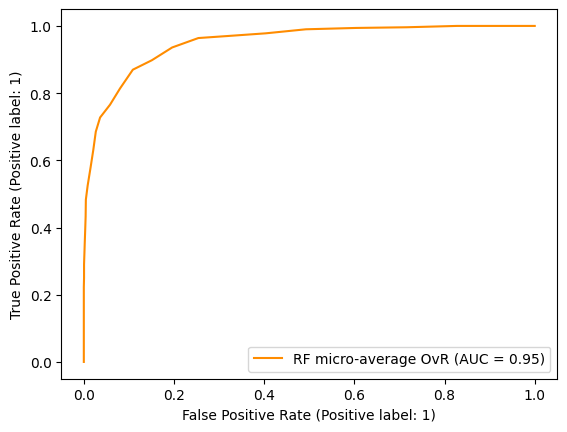

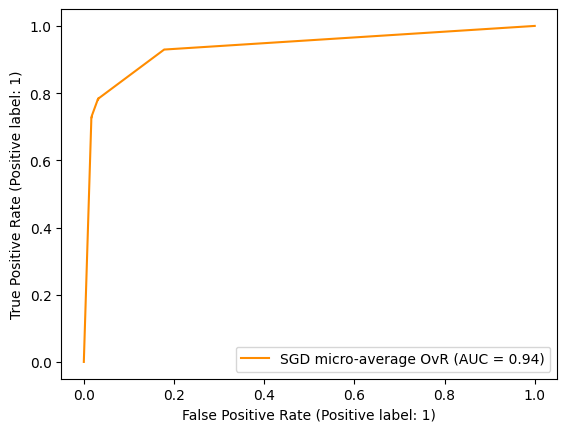

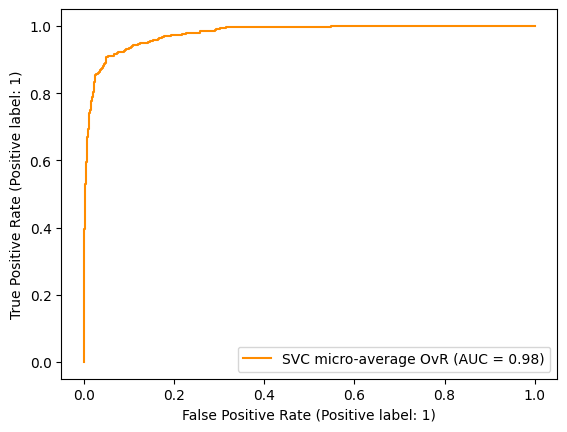

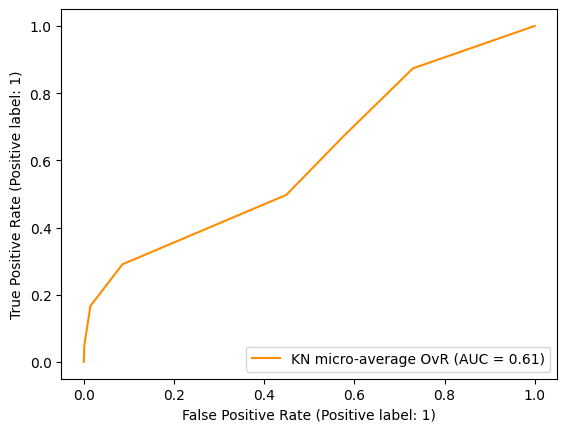

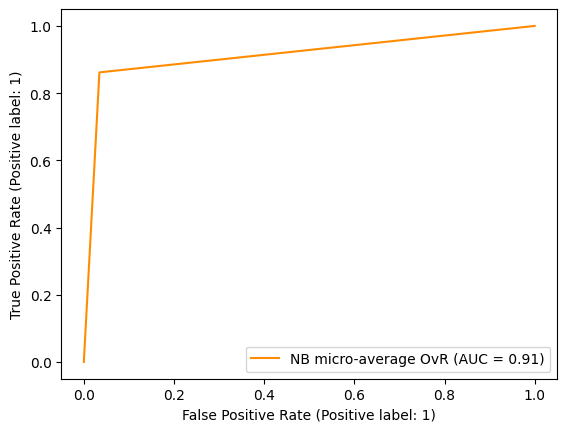

In [56]:
## THIS IS WHERE YOU IMPORT YOUR MODEL AND REPLACE RANDOMFOREST WITH IT

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Y_train=np.array(Y_train)
folds = StratifiedKFold(n_splits=10)

scores_logistic = []
scores_svm = []
scores_rf = []
scores_SGD=[]
scores_SVC=[]
scores_KN=[]
scores_NB=[]
scores_XGB=[]

sgd=SGDClassifier(loss="modified_huber")
rf=(RandomForestClassifier(n_estimators=40))
svc=SVC(probability=True)
kn=KNeighborsClassifier(n_neighbors=10)
nb=GaussianNB()
xgb=XGBClassifier(objective="binary:logistic", random_state=45, learning_rate = 0.02)
class confusion_matrix_result:
    def __init__(self):
        self.result = []
    def add(self, next_result):
        self.result.append(next_result)

rf_result = confusion_matrix_result()
sgd_result = confusion_matrix_result()
svc_result = confusion_matrix_result()
kn_result = confusion_matrix_result()
nb_result = confusion_matrix_result()
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(alpha, Y_train, test_size=0.2, random_state=42)
once = 1
for train_index, test_index in folds.split(alpha,Y_train):
    X_train, X_test, y_train, y_test = alpha[train_index], alpha[test_index], \
                                       Y_train[train_index], Y_train[test_index]
    #scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    #scores_XGB.append((get_score(xgb,X_train,X_test,y_train,y_test)))  

    True_Result = y_test
    scores_rf.append(get_score(rf, X_train, X_test, y_train, y_test))
    if (once == 1):
      label_binarizer = LabelBinarizer().fit(y_train)
      y_onehot_test = label_binarizer.transform(y_test)
      y_score = rf.fit(X_train, y_train).predict_proba(X_test)
      RocCurveDisplay.from_predictions(
              y_onehot_test.ravel(),
              y_score.ravel(),
              name=f"RF micro-average OvR",
              color="darkorange",
      )
    Prediction_Result = []
    for X in X_test:
        Prediction_Result.append(rf.predict(X))
    rf_result.add(confusion_matrix(True_Result,Prediction_Result))

    scores_SGD.append(get_score(sgd,X_train,X_test,y_train,y_test))
    if (once == 1):
      label_binarizer = LabelBinarizer().fit(y_train)
      y_onehot_test = label_binarizer.transform(y_test)
      y_score = sgd.fit(X_train, y_train).predict_proba(X_test)
      RocCurveDisplay.from_predictions(
              y_onehot_test.ravel(),
              y_score.ravel(),
              name=f"SGD micro-average OvR",
              color="darkorange",
      )
    Prediction_Result = []
    for X in X_test:
        Prediction_Result.append(sgd.predict(X))
    sgd_result.add(confusion_matrix(True_Result,Prediction_Result))

    scores_SVC.append((get_score(svc,X_train,X_test,y_train,y_test)))
    if (once == 1):
      label_binarizer = LabelBinarizer().fit(y_train)
      y_onehot_test = label_binarizer.transform(y_test)
      y_score = svc.fit(X_train, y_train).predict_proba(X_test)
      RocCurveDisplay.from_predictions(
              y_onehot_test.ravel(),
              y_score.ravel(),
              name=f"SVC micro-average OvR",
              color="darkorange",
      )
    Prediction_Result = []
    for X in X_test:
        Prediction_Result.append(svc.predict(X))
    svc_result.add(confusion_matrix(True_Result,Prediction_Result))

    scores_KN.append((get_score(kn,X_train,X_test,y_train,y_test)))
    if (once == 1):
      label_binarizer = LabelBinarizer().fit(y_train)
      y_onehot_test = label_binarizer.transform(y_test)
      y_score = kn.fit(X_train, y_train).predict_proba(X_test)
      RocCurveDisplay.from_predictions(
              y_onehot_test.ravel(),
              y_score.ravel(),
              name=f"KN micro-average OvR",
              color="darkorange",
      )
    Prediction_Result = []
    for X in X_test:
        Prediction_Result.append(kn.predict(X))
    kn_result.add(confusion_matrix(True_Result,Prediction_Result))
    
    scores_NB.append((get_score(nb,X_train.toarray(),X_test.toarray(),y_train,y_test)))
    if (once == 1):
      label_binarizer = LabelBinarizer().fit(y_train)
      y_onehot_test = label_binarizer.transform(y_test)
      y_score = nb.fit(X_train.toarray(), y_train).predict_proba(X_test.toarray())
      RocCurveDisplay.from_predictions(
              y_onehot_test.ravel(),
              y_score.ravel(),
              name=f"NB micro-average OvR",
              color="darkorange",
      )
    Prediction_Result = []
    for X in X_test:
        Prediction_Result.append(rf.predict(X))
    nb_result.add(confusion_matrix(True_Result,Prediction_Result))
    once = 0

def calculate_confusion_matrix_average(result):
    sum = np.zeros((5,5),dtype=float)
    for matrix in result:
        sum = np.add(sum, matrix)
    return np.divide(sum,10)

print("average for confusion matrix results: ")
print("rf: ")
print(calculate_confusion_matrix_average(rf_result.result))
print("sgd: ")
print(calculate_confusion_matrix_average(sgd_result.result))
print("svc: ")
print(calculate_confusion_matrix_average(svc_result.result))
print("kn: ")
print(calculate_confusion_matrix_average(kn_result.result))
print("nb: ")
print(calculate_confusion_matrix_average(nb_result.result))


In [ ]:
df=pd.DataFrame([
     X_test
])

df.to_csv('x_test.csv', index=False)

In [57]:
print("SCORE RANDOM FOREST CLASSIFIER",scores_rf)
print("MEAN",np.mean(scores_rf))
print("SCORE STOCHASTIC GRADIENT DESCENT",scores_SGD)
print("MEAN",np.mean(scores_SGD))
print("SCORE SVC",scores_SVC)
print("MEAN",np.mean(scores_SVC))
print("SCORE K-Nearest",scores_KN)
print("MEAN",np.mean(scores_KN))
print("SCORE Naive Bayes",scores_NB)
print("MEAN",np.mean(scores_NB))

SCORE RANDOM FOREST CLASSIFIER [0.7895791583166333, 0.7414829659318637, 0.7134268537074149, 0.7675350701402806, 0.7414829659318637, 0.8857715430861723, 0.7975951903807615, 0.7755511022044088, 0.781563126252505, 0.6686746987951807]
MEAN 0.7662662674747084
SCORE STOCHASTIC GRADIENT DESCENT [0.8176352705410822, 0.8296593186372746, 0.8236472945891784, 0.8256513026052105, 0.8016032064128257, 0.9478957915831663, 0.8076152304609219, 0.8236472945891784, 0.779559118236473, 0.6987951807228916]
MEAN 0.8155709008378202
SCORE SVC [0.8637274549098196, 0.8697394789579158, 0.8256513026052105, 0.8496993987975952, 0.8637274549098196, 0.9739478957915831, 0.8076152304609219, 0.8096192384769539, 0.8136272545090181, 0.7309236947791165]
MEAN 0.8408278404197954
SCORE K-Nearest [0.32064128256513025, 0.34468937875751504, 0.31462925851703405, 0.3066132264529058, 0.3667334669338677, 0.46292585170340683, 0.41282565130260523, 0.4148296593186373, 0.3106212424849699, 0.22088353413654618]
MEAN 0.3475392552172618
SCORE

## Training for Prediction
### Y_train for Genre
### Y_train2 for Author

In [27]:

# The alpha_test is vectorized in same block as the regular training and testing dataset
# current book text is from MOBY DICK
from sklearn.svm import SVC
svc=SVC()
svc.fit(alpha, Y_train)



SVC()

## Prediction

In [40]:
predictions = svc.predict(alpha_test.toarray())
print(predictions)

['adventures']


## Bias and Variance

[[1.         1.         1.         1.         1.         1.
  1.         0.99749373 1.         1.        ]
 [0.99845798 0.99845798 0.99691596 0.9922899  0.99768697 0.99306091
  0.99614495 0.99768697 0.99460293 0.99691596]
 [0.99316629 0.99316629 0.99316629 0.98906606 0.99271071 0.99088838
  0.9904328  0.99453303 0.99134396 0.99362187]
 [0.98836081 0.99030068 0.98771419 0.98609764 0.98965406 0.98997737
  0.98706757 0.98900744 0.98836081 0.98997737]
 [0.98621899 0.98847407 0.98797294 0.98722125 0.98722125 0.98772238
  0.98747181 0.98697068 0.98646956 0.98847407]]


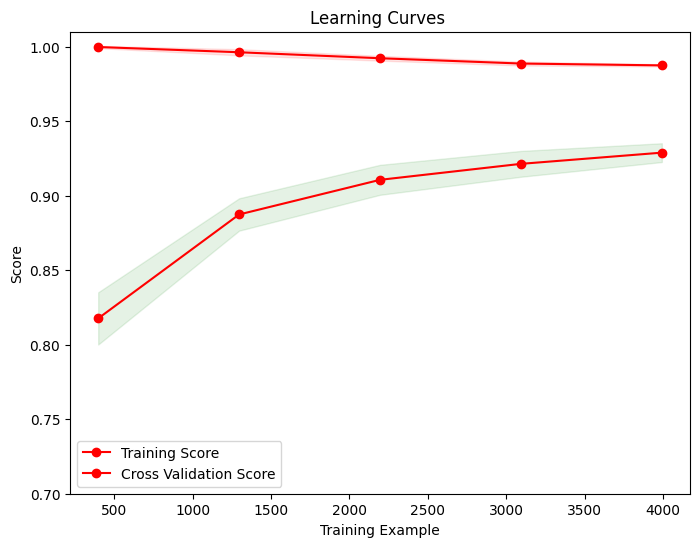

In [9]:
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(estimator, title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1,5)):
  plt.figure(figsize=(8,6))
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training Example")
  plt.ylabel("Score")
  ###
  train_sizes,train_scores,test_scores= learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
  ###
  train_scores_mean = np.mean(train_scores,axis=1)
  train_scores_std = np.std(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  test_scores_std = np.std(test_scores,axis=1)
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,alpha=0.1,color= "r")
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,alpha=0.1,color= "g")
  plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training Score')
  plt.plot(train_sizes,test_scores_mean,'o-',color='r',label='Cross Validation Score')
  plt.legend(loc='best')
  return plt
X=alpha.toarray()
y=Y_train

title ="Learning Curves "

cv= ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)

estimator =GaussianNB()

plot_learning_curve(estimator,title,X,y,ylim=(0.7,1.01),cv=cv,n_jobs=4)

plt.show()


  
  


